In [1]:
import pandas as pd

Weather Analysis


In [2]:
#Data Pipeline : Extract
df_weather = pd.read_csv("/content/F1-Weather - Sheet.csv")
df_weather.columns

Index(['day', 'month', 'year', 'race', 'tempmin', 'humidity', 'precip',
       'windspeed', 'visibility', 'icon', 'label', 'source', 'weather link'],
      dtype='object')

In [3]:
# Data Pipline : Transform 
print(f'Missing data = \n{df_weather.isnull().sum()}')
df_weather = df_weather.dropna()
df_weather.head(2)

Missing data = 
day             0
month           0
year            0
race            0
tempmin         0
humidity        0
precip          0
windspeed       0
visibility      0
icon            0
label           0
source          0
weather link    0
dtype: int64


,day,month,year,race,tempmin,humidity,precip,windspeed,visibility,icon,label,source,weather link
0,29,August,2021,Belgium Grand Prix cancelled due to rain,10.7,98.44,20.88,17.8,3.4,rain,0,https://www.thephuketnews.com/belgium-grand-pr...,https://www.visualcrossing.com/weather/weather...
1,25,September,2021,Final F1 Russian GP practice cancelled due to ...,11.0,84.36,57.66,32.4,9.5,rain,0,https://www.skysports.com/f1/news/12433/124173...,https://www.visualcrossing.com/weather/weather...


In [4]:
!pip install lazypredict

     |████████████████████████████████| 127.6 MB 20 kB/s 
     |████████████████████████████████| 302 kB 64.1 MB/s 
     |████████████████████████████████| 1.2 MB 59.6 MB/s 
     |████████████████████████████████| 269 kB 72.1 MB/s 
     |████████████████████████████████| 6.8 MB 50.6 MB/s 
     |████████████████████████████████| 248 kB 78.5 MB/s 
     |████████████████████████████████| 10.1 MB 28.3 MB/s 
     |████████████████████████████████| 14.5 MB 53.1 MB/s 
     |████████████████████████████████| 25.9 MB 72.5 MB/s 
     |████████████████████████████████| 72 kB 843 kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=bc51e99278a2f41c35917a6b84561b0972e5309d95fcd2065a1e569230f3a855
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully

In [6]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_weather.drop(['label','day', 'month', 'year', 'race','icon', 'source', 'weather link'], axis=1)
Y = df_weather['label']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train


100%|██████████| 29/29 [00:00<00:00, 27556.60it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.02
LabelSpreading,1.00,1.00,1.00,1.00,0.02
XGBClassifier,1.00,1.00,1.00,1.00,0.14
SGDClassifier,1.00,1.00,1.00,1.00,0.02
RandomForestClassifier,1.00,1.00,1.00,1.00,0.16
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.02
Perceptron,1.00,1.00,1.00,1.00,0.01
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.02
NuSVC,1.00,1.00,1.00,1.00,0.02


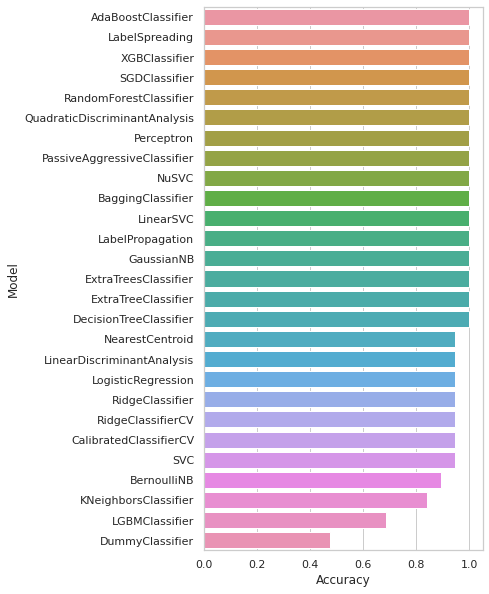

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax1 = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)
ax1

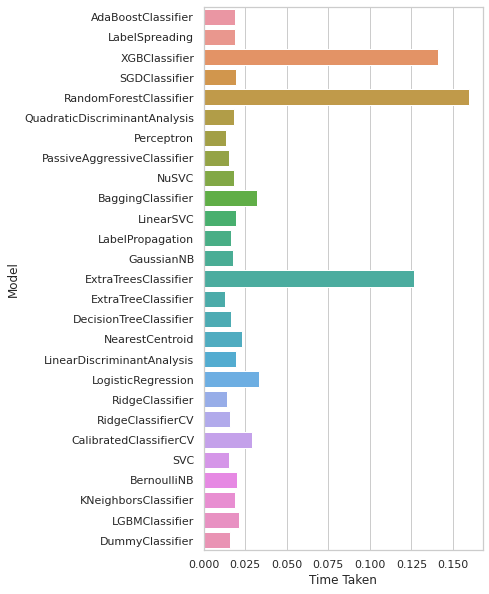

In [9]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax1 = sns.barplot(y=models_train.index, x="Time Taken", data=models_train)
ax1

In [19]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier

df_WadiRum = pd.read_csv("/content/WadiRumJordan... 2008-01-01 to 2008-09-01.csv")
df_WadiRum1 = pd.read_csv("/content/WadiRum2008-09-01 to 2008-12-31.csv")
df = pd.merge(df_WadiRum, df_WadiRum1, how='outer')

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = df[['tempmin','humidity', 'precip', 'windspeed', 'visibility']]

extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(
 X_train, y_train)
cls.score(X_test, y_test)

1.0

In [20]:
percentage = (sum(cls.predict(X)) / len(X)) * 100
print(f'{"{:.2f}".format(percentage)}%')


98.09%
